In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import plotly.express as px

In [5]:
def get_data():
    DB_NAME = 'D:/Ervin/00_dev/02_visor/01_app/data.db'
    QUERY = """
            SELECT
                i.id AS industrias_id,
                d.departamento AS departamento,
                i.municipio,
                i.cod_reg,
                i.fecha_reg,
                i.caeb,
                c.circ AS circ_descripcion,
                i.nom_unidad,
                i.razon_social,
                i.rep_legal,
                i.latitud,
                i.longitud
            FROM 
                industrias i
            JOIN 
                departamentos d ON i.departamento = d.cod_depto
            JOIN 
                circ_std c ON i.circ = c.id;
            """
    conn = sqlite3.connect(DB_NAME)
    df = pd.read_sql_query(QUERY,conn)
    return df



In [7]:
df = get_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14663 entries, 0 to 14662
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   industrias_id     14663 non-null  int64 
 1   departamento      14663 non-null  object
 2   municipio         14663 non-null  object
 3   cod_reg           14663 non-null  object
 4   fecha_reg         14663 non-null  object
 5   caeb              14663 non-null  object
 6   circ_descripcion  14663 non-null  object
 7   nom_unidad        14663 non-null  object
 8   razon_social      0 non-null      object
 9   rep_legal         0 non-null      object
 10  latitud           0 non-null      object
 11  longitud          0 non-null      object
dtypes: int64(1), object(11)
memory usage: 1.3+ MB


In [8]:
df['fecha_reg'] = pd.to_datetime(df['fecha_reg'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14663 entries, 0 to 14662
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   industrias_id     14663 non-null  int64         
 1   departamento      14663 non-null  object        
 2   municipio         14663 non-null  object        
 3   cod_reg           14663 non-null  object        
 4   fecha_reg         14658 non-null  datetime64[ns]
 5   caeb              14663 non-null  object        
 6   circ_descripcion  14663 non-null  object        
 7   nom_unidad        14663 non-null  object        
 8   razon_social      0 non-null      object        
 9   rep_legal         0 non-null      object        
 10  latitud           0 non-null      object        
 11  longitud          0 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1.3+ MB


In [11]:
df['mes_anio'] = df['fecha_reg'].dt.to_period('M')
conteo = df['mes_anio'].value_counts().sort_index().reset_index()
conteo.columns = ['mes_anio', 'conteo']

In [ ]:
conteo = df['mes_anio'].value_counts().sort_index().reset_index()
conteo.columns = ['mes_anio', 'conteo']

In [15]:
# Convertir la columna 'mes_anio' a formato string
conteo['mes_anio'] = conteo['mes_anio'].astype(str)

# Visualización con Plotly
fig = px.bar(conteo, x='mes_anio', y='conteo', title='Registros por Mes y Año',
             labels={'mes_anio': 'Mes y Año', 'conteo': 'Número de Registros'})
fig.show()

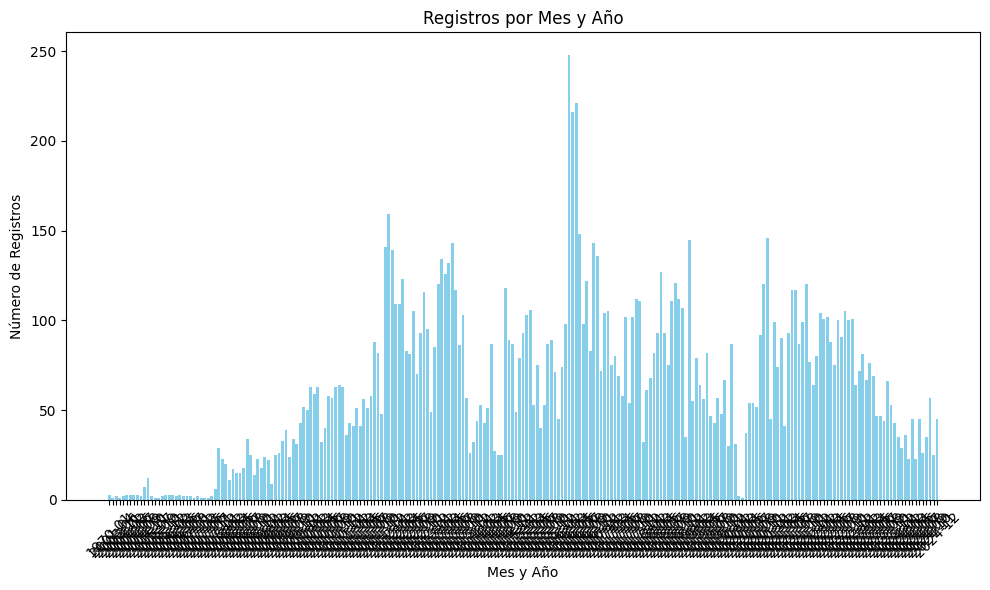

In [16]:
import matplotlib.pyplot as plt

df['mes_anio'] = df['fecha_reg'].dt.to_period('M')

# Contar registros por mes y año
conteo = df['mes_anio'].value_counts().sort_index()

# Convertir los índices a cadenas para que sean legibles en el gráfico
conteo.index = conteo.index.astype(str)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(conteo.index, conteo.values, color='skyblue')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Registros')
plt.title('Registros por Mes y Año')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\PAOLA-SUYO\AppData\Local\Temp\ipykernel_1216\1985016993.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




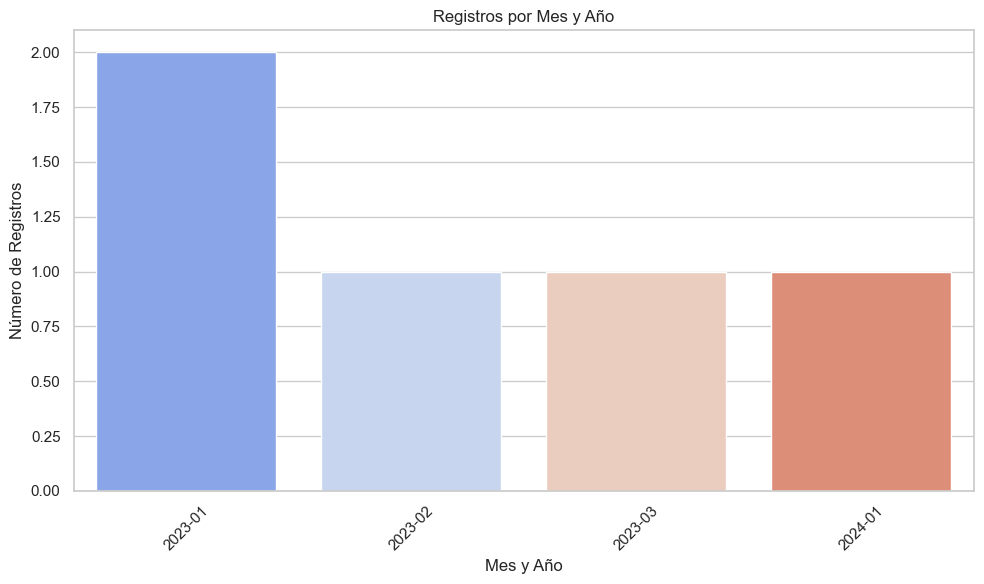

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo de DataFrame
data = {'fecha': ['2023-01-01', '2023-01-15', '2023-02-20', '2023-03-10', '2024-01-05']}
df = pd.DataFrame(data)

# Asegúrate de que la columna sea de tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Crear una nueva columna para agrupar por mes y año
df['mes_anio'] = df['fecha'].dt.to_period('M')

# Contar registros por mes y año
conteo = df['mes_anio'].value_counts().sort_index().reset_index()
conteo.columns = ['mes_anio', 'conteo']

# Convertir la columna 'mes_anio' a formato string
conteo['mes_anio'] = conteo['mes_anio'].astype(str)

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=conteo, x='mes_anio', y='conteo', palette='coolwarm')

# Personalizar el gráfico
plt.xlabel('Mes y Año')
plt.ylabel('Número de Registros')
plt.title('Registros por Mes y Año')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\PAOLA-SUYO\AppData\Local\Temp\ipykernel_1216\3463891398.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




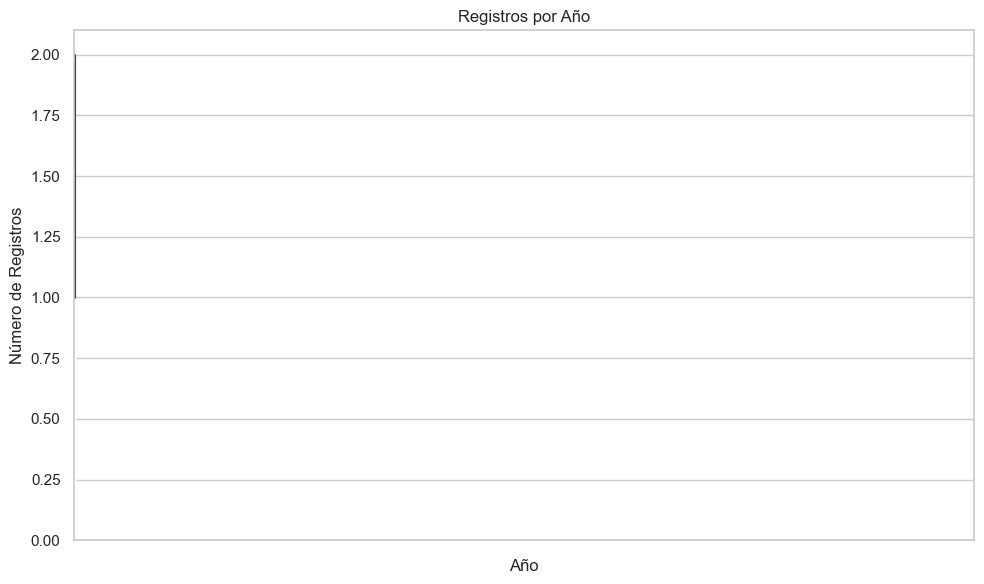

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo de DataFrame
data = {'fecha': ['2023-01-01', '2023-01-15', '2023-02-20', '2023-03-10', '2024-01-05', '2025-04-12', '2028-07-08']}
df = pd.DataFrame(data)

# Asegúrate de que la columna sea de tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Crear una nueva columna para agrupar por mes y año
df['mes_anio'] = df['fecha'].dt.to_period('M')

# Contar registros por mes y año
conteo = df['mes_anio'].value_counts().sort_index().reset_index()
conteo.columns = ['mes_anio', 'conteo']

# Extraer el año directamente del objeto 'Period'
conteo['año'] = conteo['mes_anio'].apply(lambda x: x.year)

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=conteo, x='año', y='conteo', palette='coolwarm')

# Personalizar las etiquetas del eje x para que se muestren cada 5 años
plt.xticks(ticks=range(conteo['año'].min(), conteo['año'].max() + 1, 5))

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.title('Registros por Año')
plt.tight_layout()

# Mostrar el gráfico
plt.show()
